In [28]:
# 🏦 Bank Marketing Decision Tree Classifier

# 📚 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:

# 📥 Step 2: Load the Dataset
# 🔁 Use a raw string to avoid unicode path errors if using a full path
# If 'bank-full.csv' is in the same folder, no need to modify the path
df = pd.read_csv(r"C:\Users\kotireddy81\OneDrive\Documents\bank\bank-full.csv", sep=';', encoding='latin1')

# Preview the dataset
print("✅ First 5 rows of the dataset:")
print(df.head())

✅ First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [30]:
# 🧹 Step 3: Preprocess the Data
# Convert target variable to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# One-hot encode categorical variables
X = pd.get_dummies(df.drop('y', axis=1))
y = df['y']

# Check dataset shape
print(f"\n✅ Feature shape: {X.shape}")
print(f"🎯 Target distribution:\n{y.value_counts()}")


✅ Feature shape: (45211, 51)
🎯 Target distribution:
y
0    39922
1     5289
Name: count, dtype: int64


In [31]:
# 🔀 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [32]:
# 🌳 Step 5: Train the Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:

# 📊 Step 6: Evaluate the Model
y_pred = clf.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.8972686055512551

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.64      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043

🔍 Confusion Matrix:
 [[7752  200]
 [ 729  362]]


C:\Users\kotireddy81\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


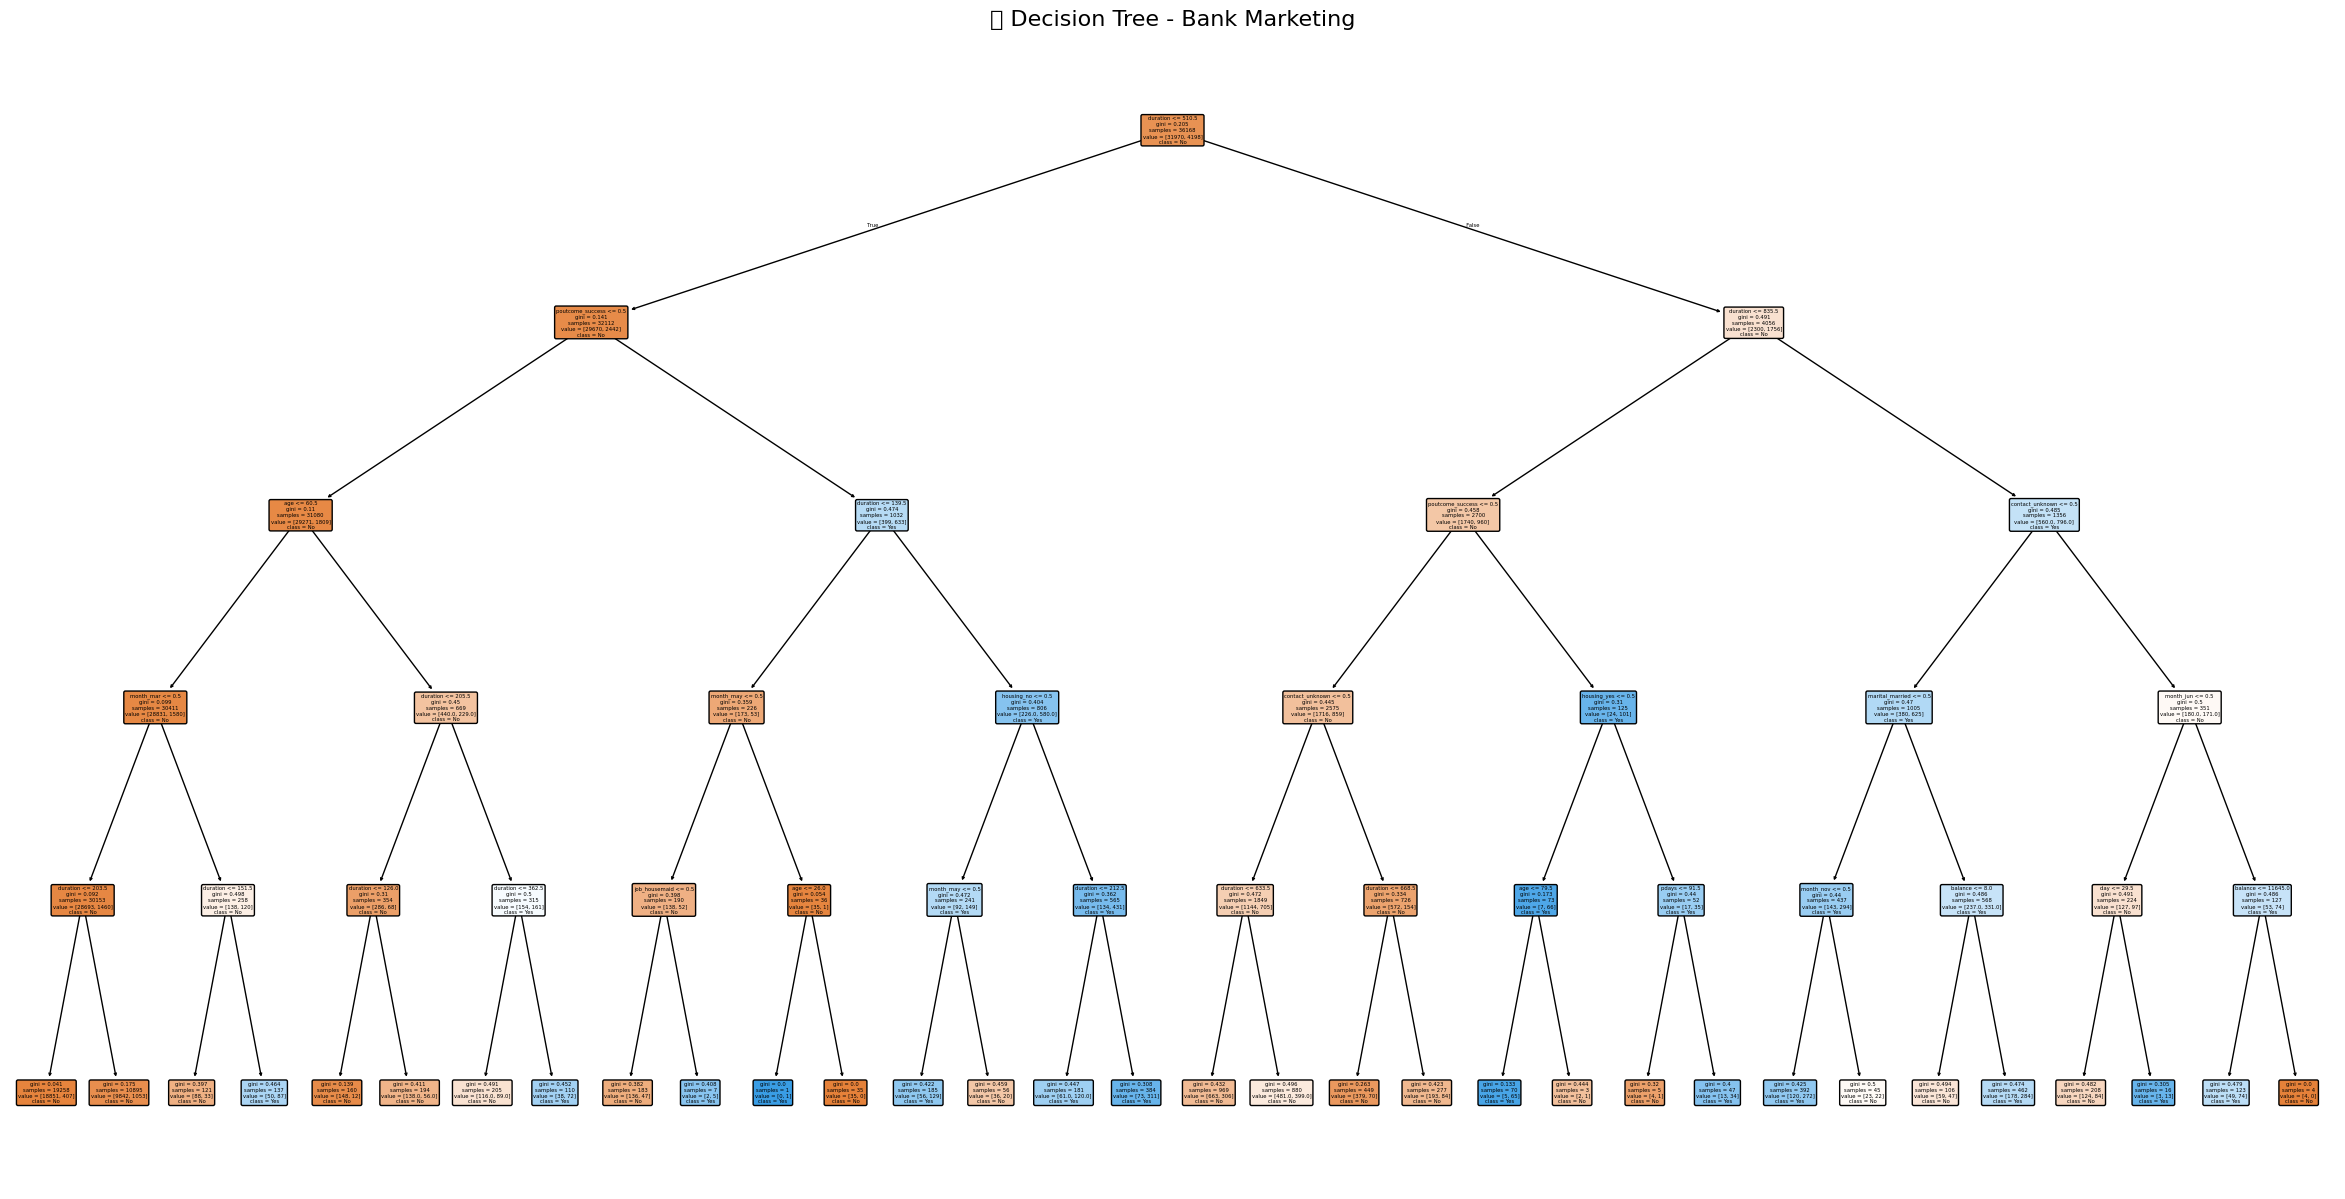

In [34]:
# 🌲 Step 7: Visualize the Tree
plt.figure(figsize=(30, 15))
plot_tree(clf, filled=True, feature_names=X.columns,
          class_names=["No", "Yes"], rounded=True)
plt.title("🌳 Decision Tree - Bank Marketing", fontsize=16)
plt.show()